In [1]:
# relevant imports
import numpy as np
import matplotlib.pyplot as plt
import rsatoolbox
import rsatoolbox.data as rsd # abbreviation to deal with dataset
import rsatoolbox.rdm as rsr
from scipy import stats
import statsmodels as sm
import src.rdms
import pandas as pd
%load_ext autoreload
%autoreload 2

%matplotlib inline
from scipy.stats import ttest_1samp

In [2]:
response_data_1 = np.load(r"..\data\betas_csv_testset\betas_csv_testset\sub-01_TestResponsesIT.npy")
response_data_2 = np.load(r"..\data\betas_csv_testset\betas_csv_testset\sub-02_TestResponsesIT.npy")
response_data_3 = np.load(r"..\data\betas_csv_testset\betas_csv_testset\sub-03_TestResponsesIT.npy")
response_data = [response_data_1, response_data_2, response_data_3]

meta_data_1 = src.rdms.get_stimulus_data(r"..\data\betas_csv_testset\betas_csv_testset\sub-01_StimulusMetadataTestset.csv")
meta_data_2 = src.rdms.get_stimulus_data(r"..\data\betas_csv_testset\betas_csv_testset\sub-02_StimulusMetadataTestset.csv")
meta_data_3 = src.rdms.get_stimulus_data(r"..\data\betas_csv_testset\betas_csv_testset\sub-03_StimulusMetadataTestset.csv")
meta_data = [meta_data_1, meta_data_2, meta_data_3]

In [3]:
import scipy.io
behav_sim = scipy.io.loadmat(r"..\data\behav_sim.mat")['behav_sim']
noise_ceil_1 = scipy.io.loadmat(r"..\data\noise_ceiling_sub01.mat")['ncind']
noise_ceil_2 = scipy.io.loadmat(r"..\data\noise_ceiling_sub02.mat")['ncind']
noise_ceil_3 = scipy.io.loadmat(r"..\data\noise_ceiling_sub03.mat")['ncind']
noise_ceil = [noise_ceil_1, noise_ceil_2, noise_ceil_3]

In [4]:
functions = [src.rdms.get_value_animacy_pictures, src.rdms.get_value_indoors_pictures, src.rdms.get_value_size_pictures, src.rdms.get_value_man_made_chatGPT,
            src.rdms.get_value_entertainment_chatGPT, src.rdms.get_value_transportation_chatGPT, src.rdms.get_value_food_chatGPT, src.rdms.get_value_metal_pictures,
            src.rdms.get_value_plastic_pictures, src.rdms.get_value_natural_material_pictures, src.rdms.get_value_kitchen_chatGPT, src.rdms.get_value_livingroom_chatGPT,
            src.rdms.get_value_bedroom_chatGPT, src.rdms.get_value_electricity_chatGPT]
category_name_list = [ 'Animacy', 'Indoors', 'Size', 'Man-Made', "Entertainment", 'Transportation',
               'Food', 'Metal', 'Plastic', 'Natural Material', 'Kitchen', 'Living room', 'Bedroom', 'Electricity']


In [ ]:
df = pd.DataFrame(columns = ['Model'])
df['Model'] = category_name_list
n_v = 0
while n_v < 3000:
    RDM_corr = rsr.calc_rdm(src.rdms.get_dataset_subset(response_data, meta_data, n_v, None, None), method='correlation', descriptor='conds')
    mean_RDM_corr = rsatoolbox.rdm.rdms.RDMs.mean(RDM_corr)
    model_rdms, models = src.rdms.get_models(mean_RDM_corr, functions, category_name_list)
    results = rsatoolbox.inference.eval_fixed(models,mean_RDM_corr, method='spearman')
    df[str(n_v)] = results.evaluations[0]
    n_v += int(5)

df.set_index('Model', inplace = True)

Text(0, 0.5, 'Correlation')

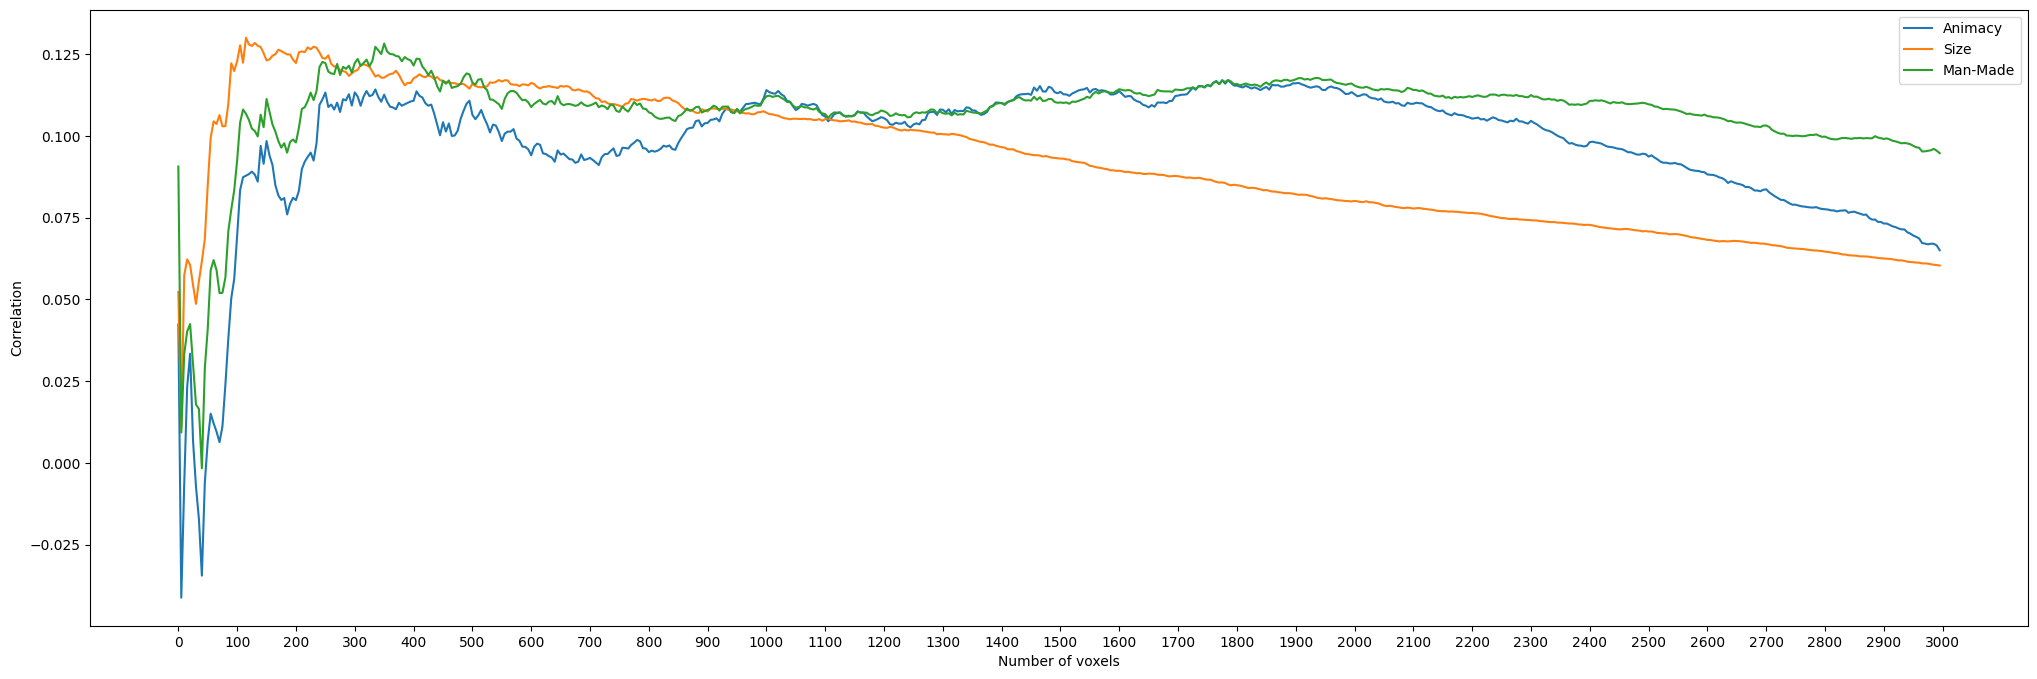

In [11]:
#all subjects
plt.figure(figsize = (25,8))
l = np.arange(0, 601, step=20)
plt.xticks(ticks=l, labels=l*5) 
plt.plot(df.loc['Animacy'], label = 'Animacy')
plt.plot(df.loc['Size'], label = 'Size')
plt.plot(df.loc['Man-Made'], label = 'Man-Made')

plt.legend()
plt.xlabel('Number of voxels')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

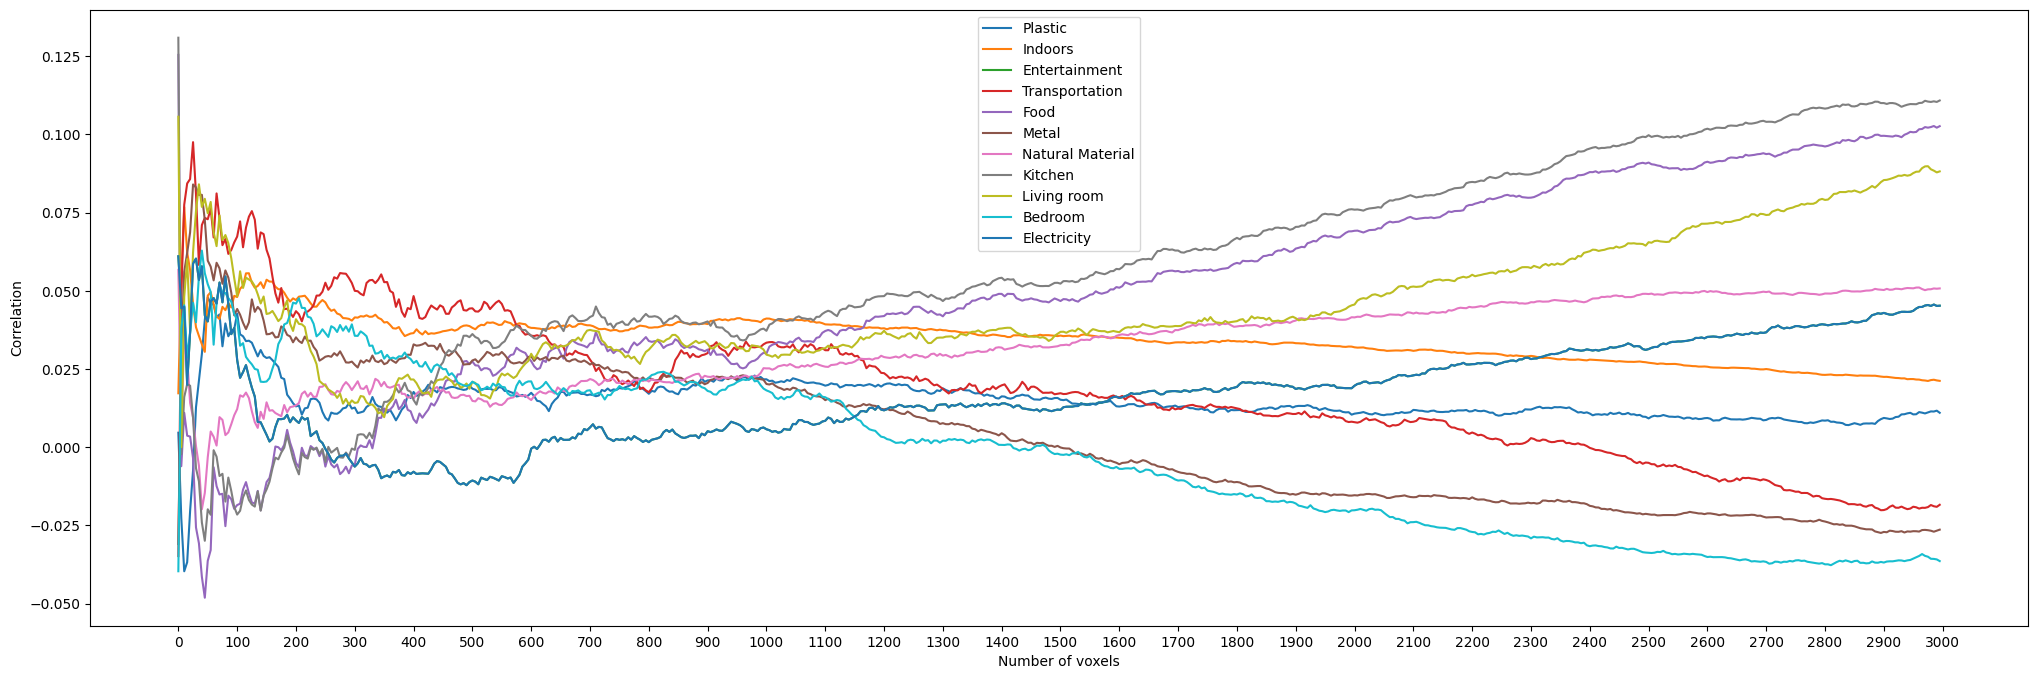

In [12]:
plt.figure(figsize = (25,8))
l = np.arange(0, 601, step=20)
plt.xticks(ticks=l, labels=l*5) 
plt.plot(df.loc['Plastic'], label = 'Plastic')
plt.plot(df.loc['Indoors'], label = 'Indoors')
plt.plot(df.loc['Entertainment'], label = 'Entertainment')
plt.plot(df.loc['Transportation'], label = 'Transportation')
plt.plot(df.loc['Food'], label = 'Food')
plt.plot(df.loc['Metal'], label = 'Metal')
plt.plot(df.loc['Natural Material'], label = 'Natural Material')
plt.plot(df.loc['Kitchen'], label = 'Kitchen')
plt.plot(df.loc['Living room'], label = 'Living room')
plt.plot(df.loc['Bedroom'], label = 'Bedroom')
plt.plot(df.loc['Entertainment'], label = 'Electricity')
plt.legend()
plt.xlabel('Number of voxels')
plt.ylabel('Correlation')

In [ ]:
from decimal import Decimal
df = pd.DataFrame(columns = ['Model'])
df['Model'] = category_name_list
cutoff = Decimal('0.0')
while cutoff <= 1:
    RDM_corr = rsr.calc_rdm(src.rdms.get_dataset_subset(response_data, meta_data, None, noise_ceil, cutoff), method='correlation', descriptor='conds')
    mean_RDM_corr = rsatoolbox.rdm.rdms.RDMs.mean(RDM_corr)
    model_rdms, models = src.rdms.get_models(mean_RDM_corr, functions, category_name_list)
    results = rsatoolbox.inference.eval_fixed(models,mean_RDM_corr, method='spearman')
    df[str(cutoff)] = results.evaluations[0]
    cutoff += Decimal('0.01')
df.set_index('Model', inplace = True)

Text(0, 0.5, 'Correlation')

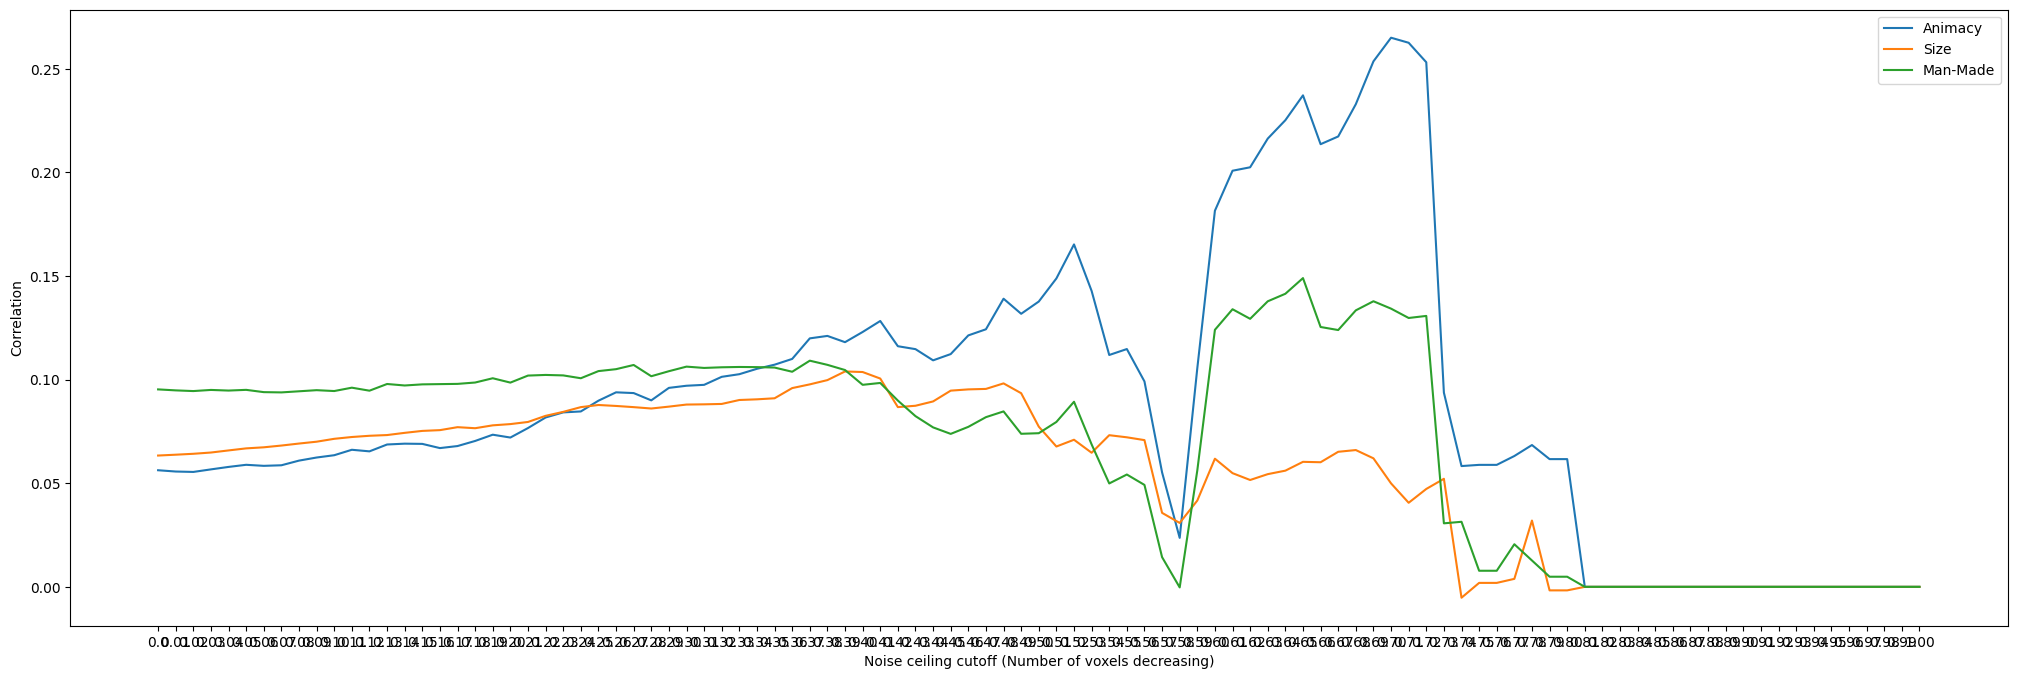

In [14]:
#averaged across participants
plt.figure(figsize = (25,8))
plt.plot(df.loc['Animacy'], label = 'Animacy')
plt.plot(df.loc['Size'], label = 'Size')
plt.plot(df.loc['Man-Made'], label = 'Man-Made')
plt.legend()
plt.xlabel('Noise ceiling cutoff (Number of voxels decreasing)')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

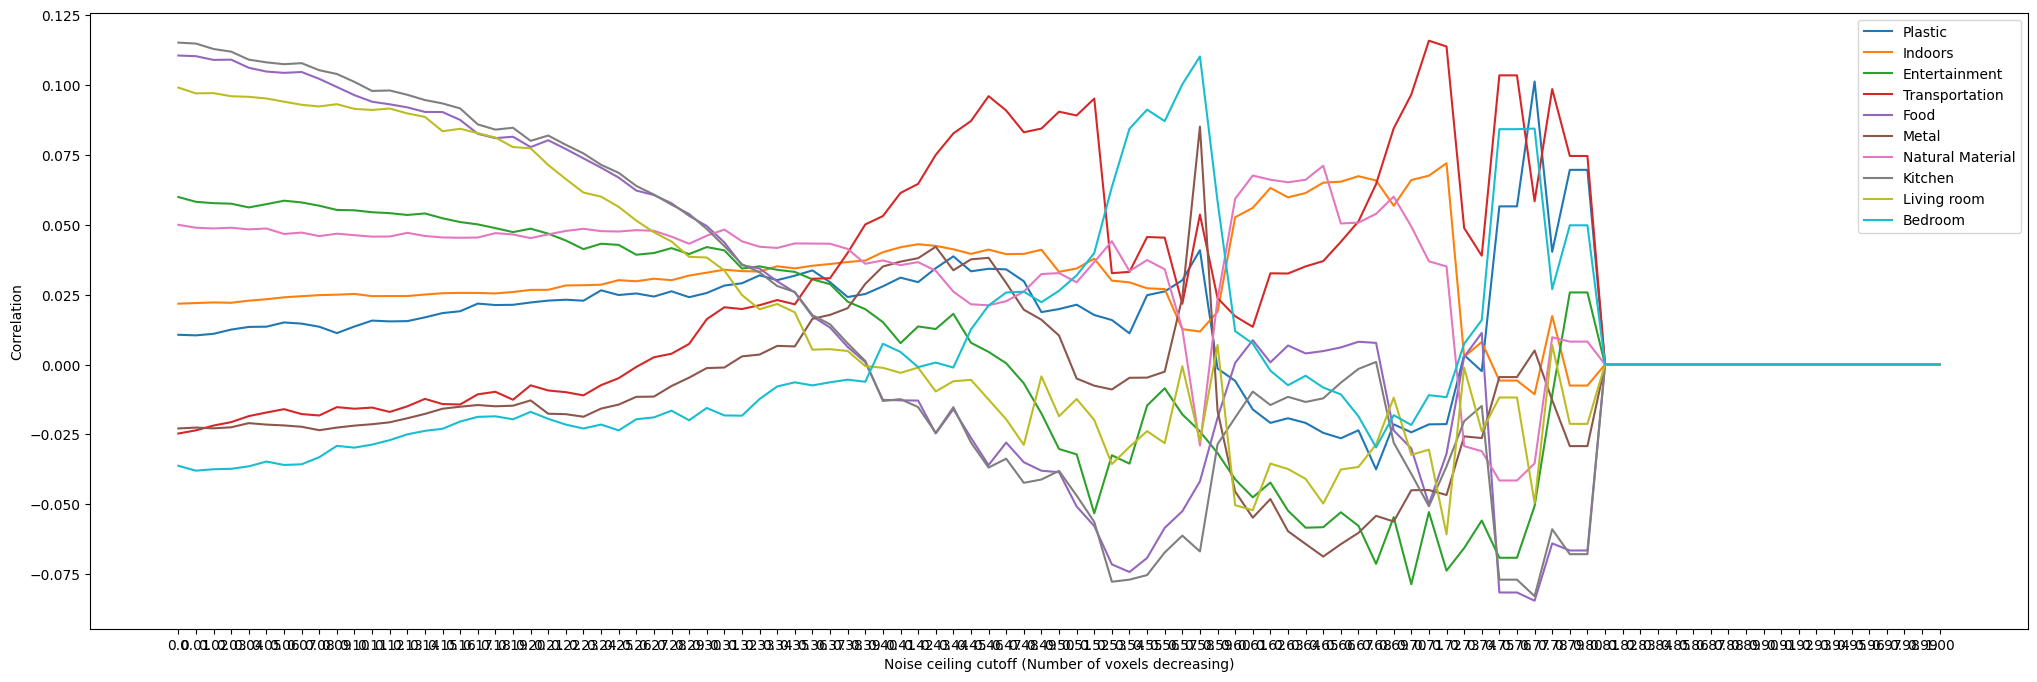

In [15]:
plt.figure(figsize = (25,8))
plt.plot(df.loc['Plastic'], label = 'Plastic')
plt.plot(df.loc['Indoors'], label = 'Indoors')
plt.plot(df.loc['Entertainment'], label = 'Entertainment')
plt.plot(df.loc['Transportation'], label = 'Transportation')
plt.plot(df.loc['Food'], label = 'Food')
plt.plot(df.loc['Metal'], label = 'Metal')
plt.plot(df.loc['Natural Material'], label = 'Natural Material')
plt.plot(df.loc['Kitchen'], label = 'Kitchen')
plt.plot(df.loc['Living room'], label = 'Living room')
plt.plot(df.loc['Bedroom'], label = 'Bedroom')
plt.legend()
plt.xlabel('Noise ceiling cutoff (Number of voxels decreasing)')
plt.ylabel('Correlation')

SPEARMAN RHO BETWEEN RDMS

In [133]:
RDM_corr = rsr.calc_rdm(src.rdms.get_dataset_subset(response_data, meta_data, 500, None, None), method='correlation', descriptor='conds')

RDM_eucl = rsr.calc_rdm(src.rdms.get_dataset_subset(response_data, meta_data, 500, None, None), method='euclidean', descriptor='conds')

mean_RDM_corr = rsatoolbox.rdm.rdms.RDMs.mean(RDM_corr)
model_rdms, models = src.rdms.get_models(mean_RDM_corr, functions, category_name_list)
mean_RDM_eucl = rsatoolbox.rdm.rdms.RDMs.mean(RDM_eucl)

compute cci

In [17]:
an_rdm = rsr.get_categorical_rdm(np.array(src.rdms.get_value_animacy_pictures(mean_RDM_corr.pattern_descriptors['conds'])), category_name='animacy')
animate_rdm = an_rdm.subset_pattern(by = 'animacy', value = 0)
inanimate_rdm = an_rdm.subset_pattern(by = 'animacy', value = 1)
animate_data_rdm = mean_RDM_corr.subset_pattern(by = 'index', value = animate_rdm.pattern_descriptors['index'])
inanimate_data_rdm = mean_RDM_corr.subset_pattern(by = 'index', value = inanimate_rdm.pattern_descriptors['index'])
across_animate_data = mean_RDM_corr.get_matrices()[0][:15][:,15:]
within_animate = np.average(animate_data_rdm.dissimilarities[0]) 
within_inanimate = np.average(inanimate_data_rdm.dissimilarities[0])
across_animate = np.average(across_animate_data) 
nom = across_animate - within_animate
nom2 = across_animate - within_inanimate
print(nom)
print(nom2)
denom = across_animate + within_animate
denom2 = across_animate + within_inanimate
print(nom/denom)
print(nom2/denom2)

0.06297135728172942
0.0041086705144322
0.040878895268556224
0.002569043747489595


In [18]:
results = rsatoolbox.inference.eval_fixed(models,mean_RDM_corr, method='spearman')

In [19]:
print("Spearman-rho between rdm and different models")
df = pd.DataFrame(columns = ['Model', 'Rho'])
df['Model'] = category_name_list
df['Rho'] = results.evaluations[0]
print(df)

Spearman-rho between rdm and different models
               Model       Rho
0            Animacy  0.106480
1            Indoors  0.038155
2               Size  0.115978
3           Man-Made  0.116345
4      Entertainment -0.010661
5     Transportation  0.044407
6               Food  0.027392
7              Metal  0.027734
8            Plastic  0.018709
9   Natural Material  0.014798
10           Kitchen  0.036169
11       Living room  0.020892
12           Bedroom  0.020941
13       Electricity  0.070753


In [21]:
results_bootstrap = rsatoolbox.inference.eval_bootstrap_pattern(models, mean_RDM_corr, method = 'spearman')

100%|██████████| 1000/1000 [00:24<00:00, 40.99it/s]


In [22]:
print(results_bootstrap)

Results for running bootstrap_pattern evaluation for spearman on 14 models:

Model            |   Eval ± SEM   | p (against 0) | p (against NC) |
--------------------------------------------------------------------
Animacy          |  0.105 ± 0.054 |        0.027  |       < 0.001  |
Indoors          |  0.037 ± 0.031 |        0.119  |       < 0.001  |
Size             |  0.119 ± 0.039 |        0.001  |       < 0.001  |
Man-Made         |  0.115 ± 0.052 |        0.015  |       < 0.001  |
Entertainment    | -0.012 ± 0.038 |        0.629  |       < 0.001  |
Transportation   |  0.045 ± 0.038 |        0.119  |       < 0.001  |
Food             |  0.027 ± 0.035 |        0.215  |       < 0.001  |
Metal            |  0.027 ± 0.039 |        0.245  |       < 0.001  |
Plastic          |  0.017 ± 0.047 |        0.360  |       < 0.001  |
Natural Material |  0.013 ± 0.036 |        0.356  |       < 0.001  |
Kitchen          |  0.036 ± 0.034 |        0.149  |       < 0.001  |
Living room      |  0.022 

In [138]:
model_rdms_eucl, eucl_models = src.rdms.get_models(mean_RDM_eucl, functions, category_name_list, None)
results_bootstrap_eucl = rsatoolbox.inference.eval_bootstrap_pattern(eucl_models, mean_RDM_eucl, method = 'spearman')

100%|██████████| 1000/1000 [00:36<00:00, 27.55it/s]


In [130]:
print(results_bootstrap_eucl)

Results for running bootstrap_pattern evaluation for spearman on 14 models:

Model            |   Eval ± SEM   | p (against 0) | p (against NC) |
--------------------------------------------------------------------
Animacy          | -0.016 ± 0.063 |        0.602  |       < 0.001  |
Indoors          |  0.020 ± 0.026 |        0.218  |       < 0.001  |
Size             |  0.050 ± 0.031 |        0.057  |       < 0.001  |
Man-Made         | -0.034 ± 0.044 |        0.780  |       < 0.001  |
Entertainment    | -0.035 ± 0.065 |        0.707  |       < 0.001  |
Transportation   | -0.051 ± 0.056 |        0.817  |       < 0.001  |
Food             | -0.126 ± 0.033 |        1.000  |       < 0.001  |
Metal            |  0.067 ± 0.053 |        0.106  |       < 0.001  |
Plastic          |  0.077 ± 0.072 |        0.143  |       < 0.001  |
Natural Material | -0.073 ± 0.031 |        0.990  |       < 0.001  |
Kitchen          | -0.124 ± 0.034 |        1.000  |       < 0.001  |
Living room      | -0.003 

In [139]:
results_eucl = rsatoolbox.inference.eval_fixed(eucl_models,mean_RDM_eucl, method='spearman')
print(results_eucl)

Results for running fixed evaluation for spearman on 14 models:

Model            |   Eval ± SEM   | p (against 0) | p (against NC) |
--------------------------------------------------------------------
Animacy          | -0.019 ±  nan |          nan  |           nan  |
Indoors          |  0.020 ±  nan |          nan  |           nan  |
Size             |  0.051 ±  nan |          nan  |           nan  |
Man-Made         | -0.036 ±  nan |          nan  |           nan  |
Entertainment    | -0.036 ±  nan |          nan  |           nan  |
Transportation   | -0.054 ±  nan |          nan  |           nan  |
Food             | -0.129 ±  nan |          nan  |           nan  |
Metal            |  0.065 ±  nan |          nan  |           nan  |
Plastic          |  0.077 ±  nan |          nan  |           nan  |
Natural Material | -0.076 ±  nan |          nan  |           nan  |
Kitchen          | -0.128 ±  nan |          nan  |           nan  |
Living room      | -0.005 ±  nan |          nan  

In [109]:
RDM_corr = rsr.calc_rdm(src.rdms.get_dataset_subset(response_data, meta_data, 500, None, None), method='correlation', descriptor='conds')
mean_RDM_corr = rsatoolbox.rdm.rdms.RDMs.mean(RDM_corr)
model_rdms, models = src.rdms.get_models(mean_RDM_corr, functions, category_name_list)
an_rdm = rsr.get_categorical_rdm(np.array(src.rdms.get_value_animals_pictures(mean_RDM_corr.pattern_descriptors['conds'])), category_name='animacy')
animate_rdm = an_rdm.subset_pattern(by = 'animacy', value = 0)
animate_data_rdm = mean_RDM_corr.subset_pattern(by = 'index', value = animate_rdm.pattern_descriptors['index'])


In [110]:
anim_functions = [src.rdms.get_value_habitat, src.rdms.get_value_carnivore_chatGPT, src.rdms.get_value_herbivore_chatGPT, src.rdms.get_value_omnivore_chatGPT,
                  src.rdms.get_value_mammal, src.rdms.get_value_reptile, src.rdms.get_value_invertebrate]
anim_category_name_list = ['Habitat', 'Carnivore', 'Herbivore', 'Omnivore', 'Mammal', 'Reptile', 'Invertebrate']
anim_rdms, anim_models = src.rdms.get_models(animate_data_rdm, anim_functions, anim_category_name_list, subset = [0,1])
animate_data_rdm.pattern_descriptors['index'] = anim_rdms[0].pattern_descriptors['index']
results_anim = rsatoolbox.inference.eval_fixed(anim_models,animate_data_rdm, method='spearman')
print("Spearman-rho between rdm and different models")
df_anim = pd.DataFrame(columns = ['Model', 'Rho'])
df_anim['Model'] = anim_category_name_list
df_anim['Rho'] = results_anim.evaluations[0]
print(df_anim)

Spearman-rho between rdm and different models
          Model       Rho
0       Habitat -0.014045
1     Carnivore  0.267283
2     Herbivore  0.014810
3      Omnivore -0.213060
4        Mammal  0.302693
5       Reptile  0.083516
6  Invertebrate  0.275279


In [96]:
results_bootstrap_anim = rsatoolbox.inference.eval_bootstrap_pattern(anim_models, animate_data_rdm, method = 'spearman')

100%|██████████| 1000/1000 [00:04<00:00, 206.95it/s]


In [97]:
print(results_bootstrap_anim)

Results for running bootstrap_pattern evaluation for spearman on 7 models:

Model        |   Eval ± SEM   | p (against 0) | p (against NC) |
----------------------------------------------------------------
Habitat      | -0.027 ± 0.203 |        0.552  |       < 0.001  |
Carnivore    |  0.249 ± 0.261 |        0.180  |         0.014  |
Herbivore    |  0.016 ± 0.249 |        0.475  |         0.002  |
Omnivore     | -0.156 ± 0.159 |        0.827  |       < 0.001  |
Mammal       |  0.303 ± 0.201 |        0.079  |         0.005  |
Reptile      |  0.061 ± 0.166 |        0.359  |       < 0.001  |
Invertebrate |  0.280 ± 0.230 |        0.124  |         0.009  |

p-values are based on uncorrected t-tests


In [ ]:
df_an_corr = pd.DataFrame(columns = ['Model'])
df_an_corr['Model'] = anim_category_name_list
n_v = 0
while n_v < 3000:
    RDM_corr = rsr.calc_rdm(src.rdms.get_dataset_subset(response_data, meta_data, n_v, None, None), method='correlation', descriptor='conds')
    mean_RDM_corr = rsatoolbox.rdm.rdms.RDMs.mean(RDM_corr)
    an_rdm = rsr.get_categorical_rdm(np.array(src.rdms.get_value_animals_pictures(mean_RDM_corr.pattern_descriptors['conds'])), category_name='animacy')
    animate_rdm = an_rdm.subset_pattern(by = 'animacy', value = 0)
    animate_data_rdm = mean_RDM_corr.subset_pattern(by = 'index', value = animate_rdm.pattern_descriptors['index'])
    anim_rdms, anim_models = src.rdms.get_models(animate_data_rdm, anim_functions, anim_category_name_list, subset = [0,1])
    animate_data_rdm.pattern_descriptors['index'] = anim_rdms[0].pattern_descriptors['index']
    results = rsatoolbox.inference.eval_fixed(anim_models,animate_data_rdm, method='spearman')
    df_an_corr[str(n_v)] = results.evaluations[0]
    n_v += int(5)

df_an_corr.set_index('Model', inplace = True)

Text(0, 0.5, 'Correlation')

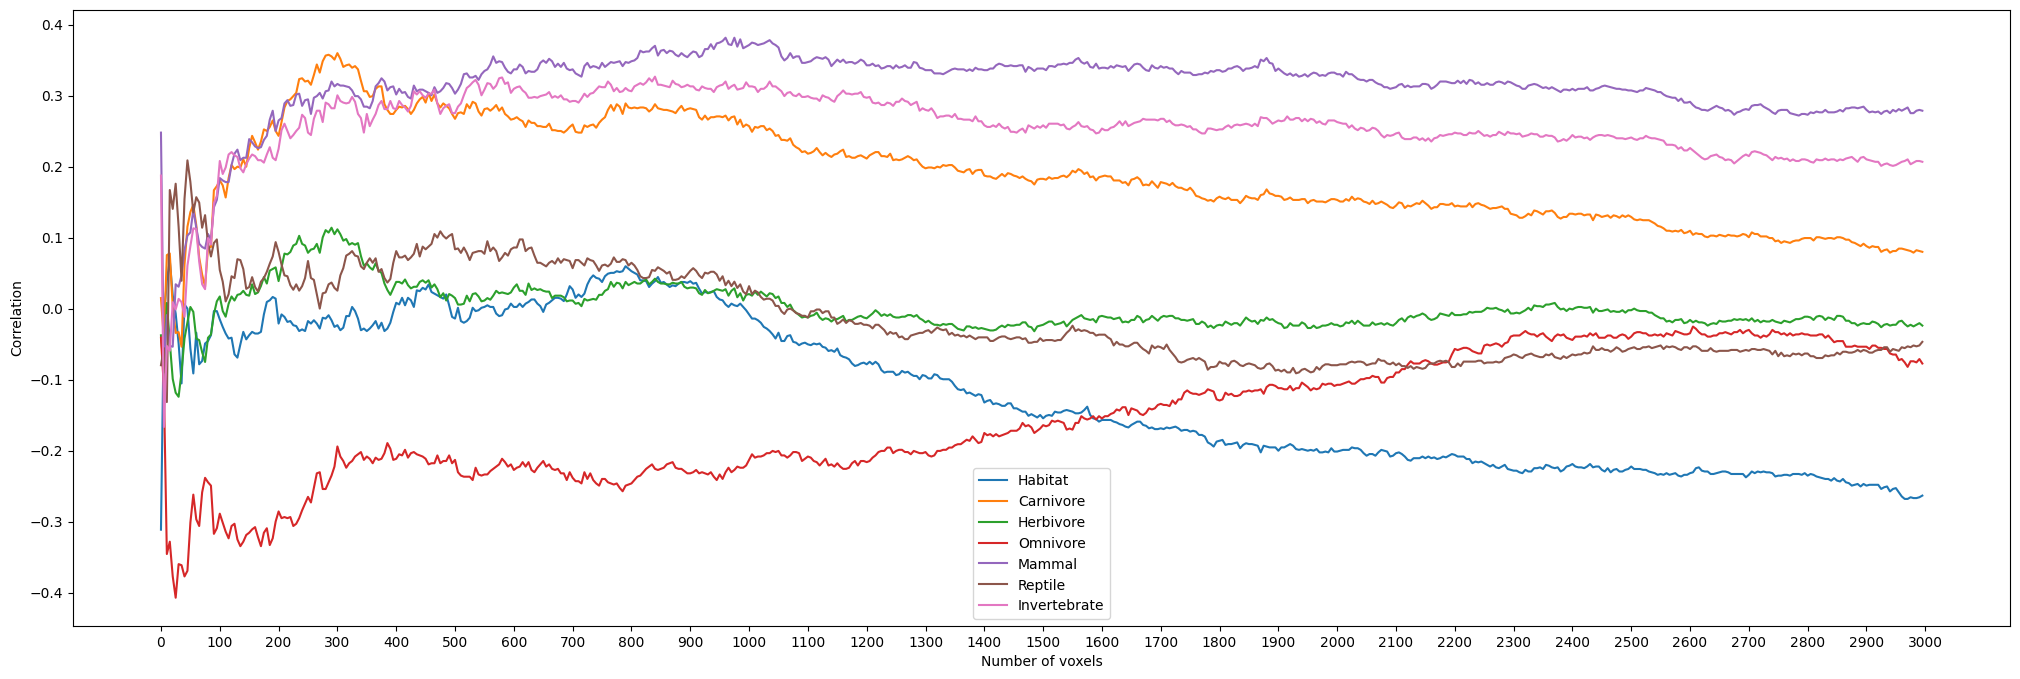

In [105]:
plt.figure(figsize = (25,8))
l = np.arange(0, 601, step=20)
plt.xticks(ticks=l, labels=l*5) 
for lab in anim_category_name_list:
    plt.plot(df_an_corr.loc[lab], label = lab)

plt.legend()
plt.xlabel('Number of voxels')
plt.ylabel('Correlation')

In [ ]:
from decimal import Decimal
df_an_corr_nc = pd.DataFrame(columns = ['Model'])
df_an_corr_nc['Model'] = anim_category_name_list
cutoff = Decimal('0.0')
while cutoff <= 1:
    RDM_corr = rsr.calc_rdm(src.rdms.get_dataset_subset(response_data, meta_data, None, noise_ceil, cutoff), method='correlation', descriptor='conds')
    mean_RDM_corr = rsatoolbox.rdm.rdms.RDMs.mean(RDM_corr)
    an_rdm = rsr.get_categorical_rdm(np.array(src.rdms.get_value_animals_pictures(mean_RDM_corr.pattern_descriptors['conds'])), category_name='animacy')
    animate_rdm = an_rdm.subset_pattern(by = 'animacy', value = 0)
    animate_data_rdm = mean_RDM_corr.subset_pattern(by = 'index', value = animate_rdm.pattern_descriptors['index'])
    anim_rdms, anim_models = src.rdms.get_models(animate_data_rdm, anim_functions, anim_category_name_list, subset = [0,1])
    animate_data_rdm.pattern_descriptors['index'] = anim_rdms[0].pattern_descriptors['index']
    results = rsatoolbox.inference.eval_fixed(anim_models,animate_data_rdm, method='spearman')
    df_an_corr_nc[str(cutoff)] = results.evaluations[0]
    cutoff += Decimal('0.01')
df_an_corr_nc.set_index('Model', inplace = True)

Text(0, 0.5, 'Correlation')

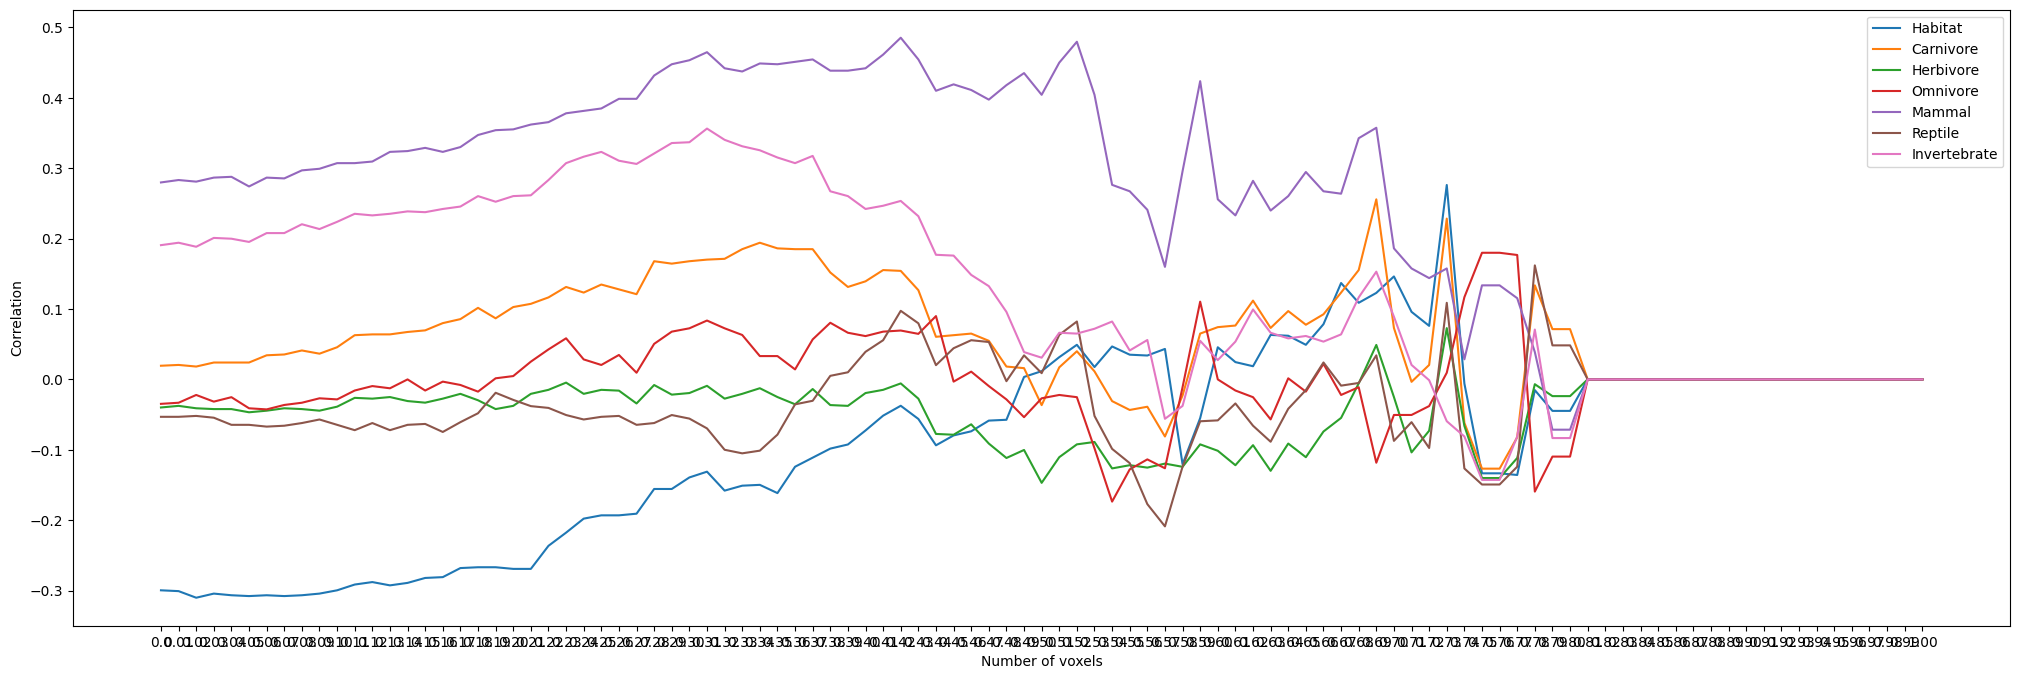

In [106]:
plt.figure(figsize = (25,8))

for lab in anim_category_name_list:
    plt.plot(df_an_corr_nc.loc[lab], label = lab)

plt.legend()
plt.xlabel('Number of voxels')
plt.ylabel('Correlation')

MODEL FIT

In [23]:
df = pd.DataFrame(columns = category_name_list)
normalized_rdms = src.rdms.normalize_rdms(model_rdms)
for i in range(len(normalized_rdms)):
    df[category_name_list[i]] = normalized_rdms[i]
df = sm.tools.add_constant(df)


In [24]:
res_nnls = scipy.optimize.nnls(df, mean_RDM_corr.get_vectors()[0])
df_res = pd.DataFrame(columns = ['', 'coef'])
df_res[''] = df.columns
df_res['coef'] = res_nnls[0]
print(df_res)

                          coef
0              const  0.801792
1            Animacy  0.007444
2            Indoors  0.000835
3               Size  0.009839
4           Man-Made  0.007209
5      Entertainment  0.000000
6     Transportation  0.003262
7               Food  0.000000
8              Metal  0.002421
9            Plastic  0.003013
10  Natural Material  0.000000
11           Kitchen  0.004007
12       Living room  0.001904
13           Bedroom  0.003215
14       Electricity  0.006946


In [25]:
constant = rsr.get_categorical_rdm(np.ones(len(model_rdms[0].to_dict()['pattern_descriptors']['index'])), category_name='constant')
constant.dissimilarities = constant.dissimilarities +1
model_constant= rsatoolbox.model.ModelFixed('constant', constant)
c_model = [model_constant] + models
r = src.rdms.bootstrap_nnls(c_model, mean_RDM_corr,method = 'spearman', N=1000)
print(r)

100%|██████████| 1000/1000 [00:17<00:00, 58.46it/s]

Results for running bootstrap_pattern_nnls evaluation for spearman on 15 models:

Model            |   Eval ± SEM   | p (against 0) | p (against NC) |
--------------------------------------------------------------------
constant         |  0.802 ± 0.007 |      < 0.001  |       < 0.001  |
Animacy          |  0.008 ± 0.005 |        0.068  |       < 0.001  |
Indoors          |  0.002 ± 0.002 |        0.233  |       < 0.001  |
Size             |  0.010 ± 0.003 |        0.003  |       < 0.001  |
Man-Made         |  0.007 ± 0.005 |        0.087  |       < 0.001  |
Entertainment    |  0.001 ± 0.002 |        0.319  |       < 0.001  |
Transportation   |  0.004 ± 0.003 |        0.115  |       < 0.001  |
Food             |  0.001 ± 0.002 |        0.278  |       < 0.001  |
Metal            |  0.003 ± 0.003 |        0.178  |       < 0.001  |
Plastic          |  0.004 ± 0.004 |        0.174  |       < 0.001  |
Natural Material |  0.000 ± 0.001 |        0.394  |       < 0.001  |
Kitchen          |  0

In [116]:
df_anim_fit = pd.DataFrame(columns = anim_category_name_list)
normalized_anim_rdms = src.rdms.normalize_rdms(anim_rdms)
for i in range(len(normalized_anim_rdms)):
    df_anim_fit[anim_category_name_list[i]] = normalized_anim_rdms[i]
df_anim_fit = sm.tools.add_constant(df_anim_fit)

anim_res_nnls = scipy.optimize.nnls(df_anim_fit, animate_data_rdm.get_vectors()[0])

df_res_anim = pd.DataFrame(columns = ['', 'coef'])
df_res_anim[''] = df_anim_fit.columns
df_res_anim['coef'] = anim_res_nnls[0]
print(df_res_anim)

                     coef
0         const  0.720543
1       Habitat  0.000000
2     Carnivore  0.008994
3     Herbivore  0.000000
4      Omnivore  0.000000
5        Mammal  0.012768
6       Reptile  0.005765
7  Invertebrate  0.012592


VISUALISATIONS

c:\Users\rogal\miniconda3\envs\Playing20QWithNature\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


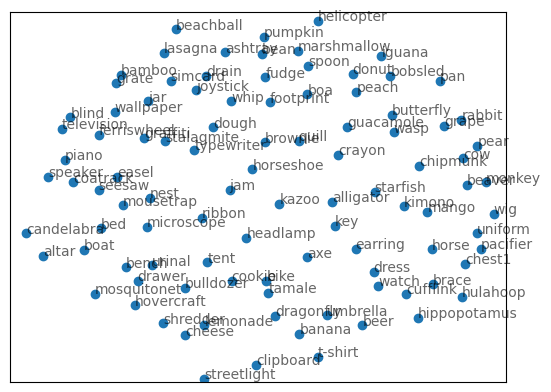

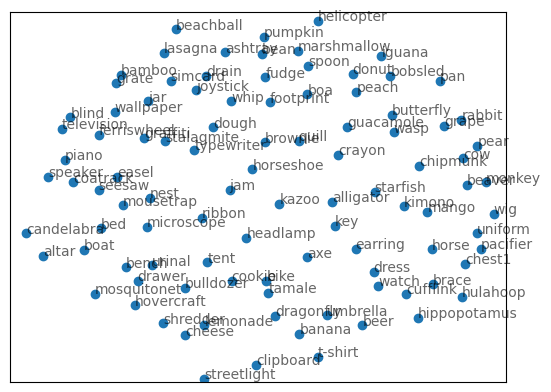

In [27]:
rsatoolbox.vis.show_MDS(
    mean_RDM_corr,
   # rdm_descriptor='name',
    pattern_descriptor='conds'
)

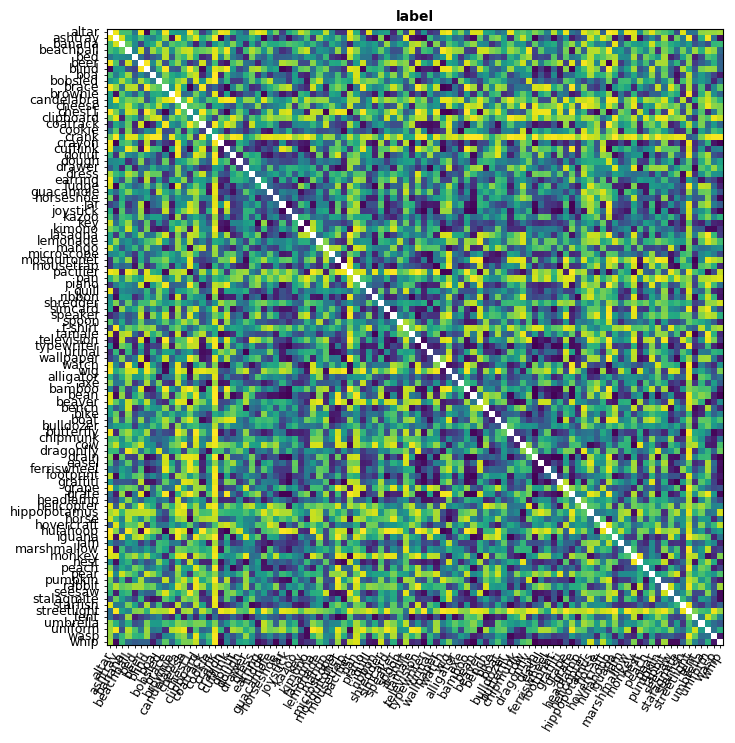

In [28]:
mean_RDM_corr_rank_animacy = rsatoolbox.rdm.rank_transform(src.rdms.sort_rdm(mean_RDM_corr, src.rdms.get_value_indoors_pictures))
#mean_RDM_corr_rank_animacy2.rdm_descriptors = {'label': ['animacy']}

#print(mean_RDM_corr_rank_animacy2.rdm_descriptors[0])
fig, ax, ret_val = rsatoolbox.vis.show_rdm(mean_RDM_corr_rank_animacy, cmap = 'viridis', pattern_descriptor = 'conds', figsize = (8,8), rdm_descriptor='label')

In [32]:
sorted_rdms = []
for i in range(len(category_name_list)):
    sorted_rdms.append(rsatoolbox.rdm.rank_transform(src.rdms.sort_rdm(mean_RDM_corr, functions[i])))
rdms = rsatoolbox.rdm.concat(sorted_rdms)
rdms.rdm_descriptors = {'label': category_name_list}


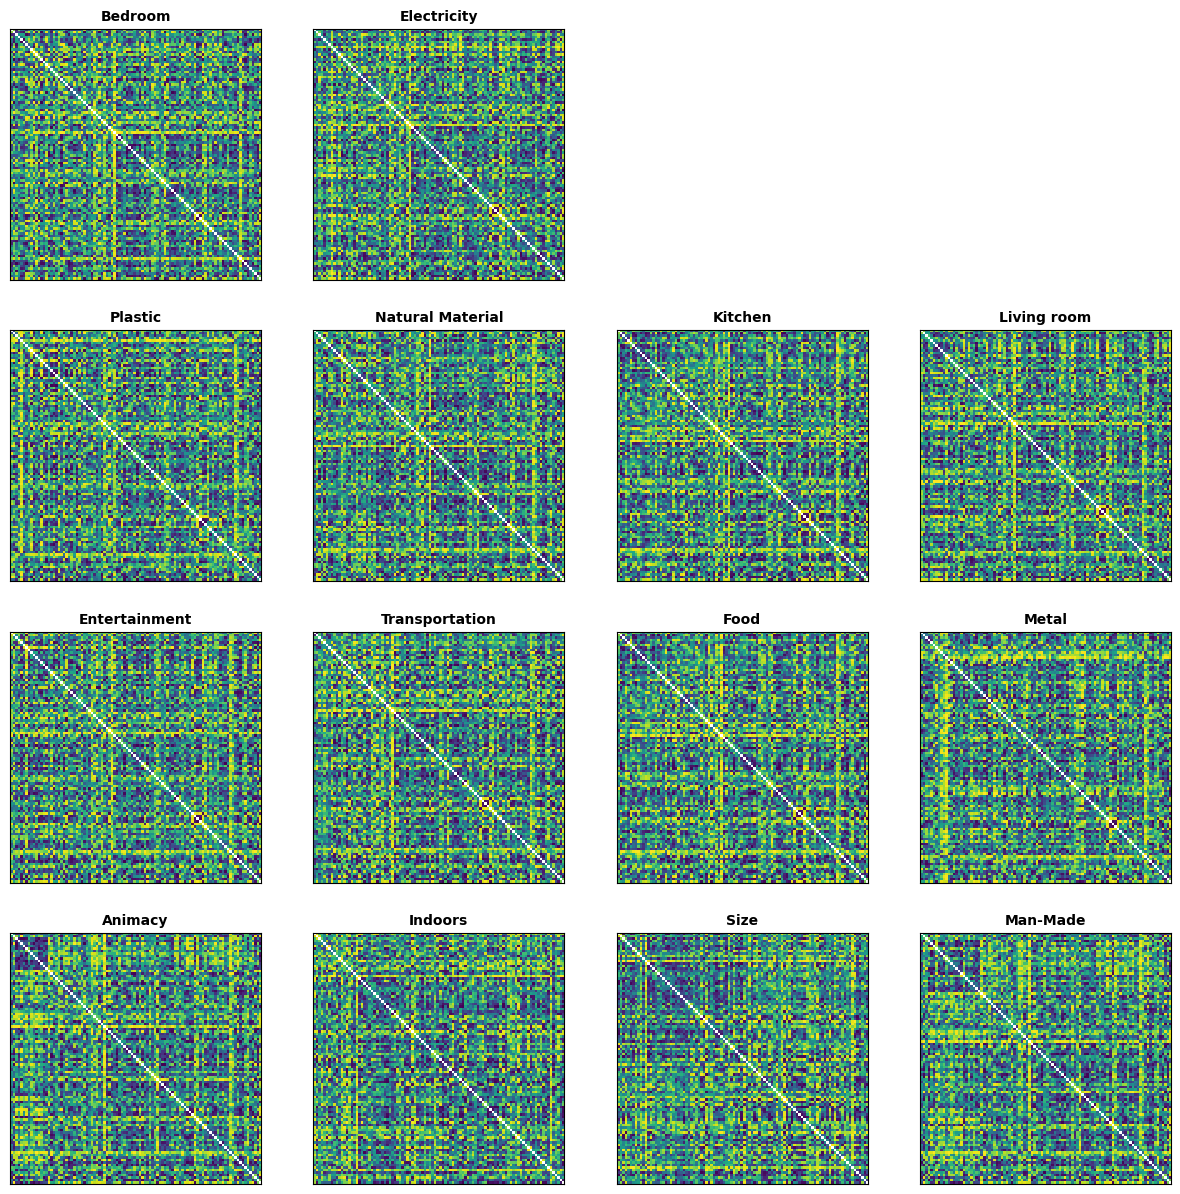

In [33]:
fig, ax, ret_val = rsatoolbox.vis.show_rdm(rdms, cmap = 'viridis', figsize = (15,15), rdm_descriptor = 'label')